# Tratamento de dados

- Remover colunas irrelevantes
- Dados faltantes
- Dados categóricos
- One Hot Encoding
- Dados duplicados
- Normalização
- Balanceamento
- Salvar novo CSV tratado

### **IMPORTS**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
test=pd.read_csv('Data/test.csv')
train=pd.read_csv('Data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **REMOÇÃO DOS DADOS IRRELEVANTES**

In [4]:
#Remoção: Name, Ticket e Cabin

train.drop(columns=['Name', 'Ticket'], inplace=True)
train.drop(columns=['Cabin'], inplace=True)

### **TRATAMENTO DE DADOS FALTANTES**

In [5]:
#Dados faltantes: Age e Embarked

train.fillna({'Age':train.Age.mean()}, inplace=True)
train.fillna({'Embarked':0}, inplace=True)
#train['Embarked'].value_counts()
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### **TRATAMENTO DE DADOS CATEGÓRICOS**

In [6]:
#Dados categóricos: Sex e Embarked

train.replace({'male':0, 'female':1}, inplace=True)
train.replace({'C':0, 'Q':1, 'S':2}, inplace=True)

### **DADOS DUPLICADOS**

In [7]:
train.duplicated().value_counts()

False    891
dtype: int64

### **NORMALIZAÇÃO**

In [8]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numeric_data = train.drop(columns=categorical_columns, inplace=False)

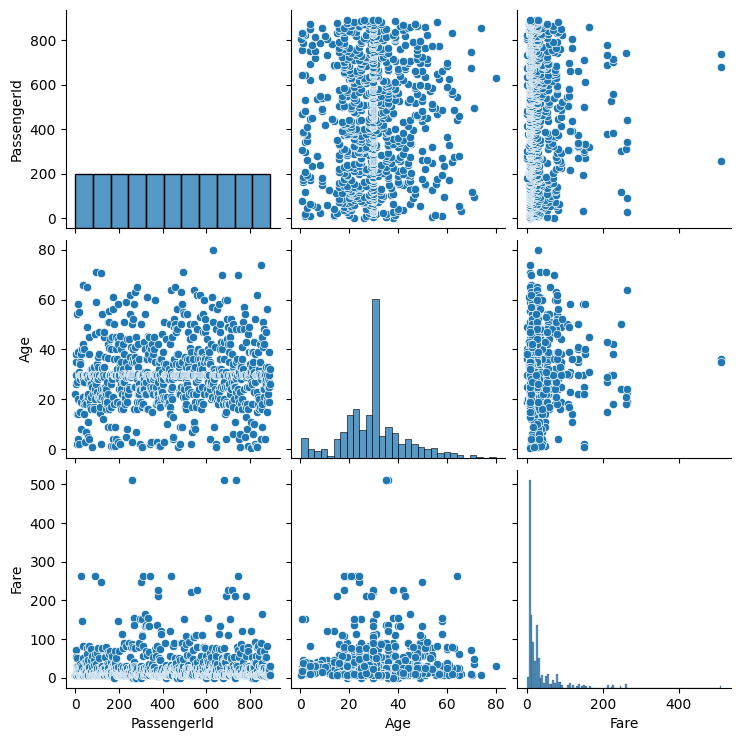

In [9]:
sns.pairplot(data=numeric_data)

In [10]:
#print(scaler.fit(data_norm), end='\n\n')
#print(type(scaler.mean_))
#print(scaler.mean_, end='\n\n')
#print(scaler.var_, end='\n\n')
#print(scaler.transform(data_norm), end='\n\n')

In [11]:
scaler=StandardScaler()
scaler.fit(numeric_data)
norm_matriz=scaler.transform(numeric_data)
norm_matriz

array([[-1.73010796, -0.5924806 , -0.50244517],
       [-1.72622007,  0.63878901,  0.78684529],
       [-1.72233219, -0.2846632 , -0.48885426],
       ...,
       [ 1.72233219,  0.        , -0.17626324],
       [ 1.72622007, -0.2846632 , -0.04438104],
       [ 1.73010796,  0.17706291, -0.49237783]])

### **SALVAR DADOS TRATADOS EM CSV**

In [12]:
#DataFrame com dados normalizados e as colunos retiradas0
train_norm = pd.DataFrame(data=norm_matriz, columns=numeric_data.columns.to_list())
train_norm

,PassengerId,Age,Fare
0,-1.730108,-0.592481,-0.502445
1,-1.726220,0.638789,0.786845
2,-1.722332,-0.284663,-0.488854
3,-1.718444,0.407926,0.420730
4,-1.714556,0.407926,-0.486337
...,...,...,...
886,1.714556,-0.207709,-0.386671
887,1.718444,-0.823344,-0.044381
888,1.722332,0.000000,-0.176263
889,1.726220,-0.284663,-0.044381


In [13]:
train_norm = pd.concat([train_norm, train.drop(columns=numeric_data.columns.to_list())], axis=1)
train_norm

,PassengerId,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,-1.730108,-0.592481,-0.502445,0,3,0,1,0,2
1,-1.726220,0.638789,0.786845,1,1,1,1,0,0
2,-1.722332,-0.284663,-0.488854,1,3,1,0,0,2
3,-1.718444,0.407926,0.420730,1,1,1,1,0,2
4,-1.714556,0.407926,-0.486337,0,3,0,0,0,2
...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.207709,-0.386671,0,2,0,0,0,2
887,1.718444,-0.823344,-0.044381,1,1,1,0,0,2
888,1.722332,0.000000,-0.176263,0,3,1,1,2,2
889,1.726220,-0.284663,-0.044381,1,1,0,0,0,0


### **BALANCEAMENTO DOS DADOS**

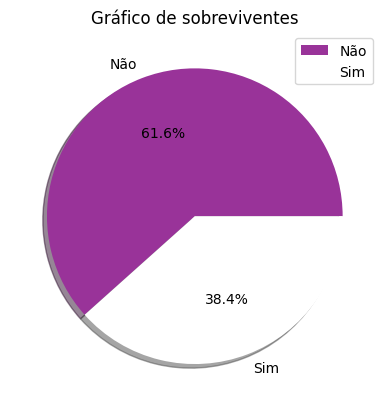

In [14]:
plt.pie(
    x=train['Survived'].value_counts(), 
    labels=['Não', 'Sim'],
    colors=['#993399', '#ffffff'],
    autopct='%1.1f%%',
    shadow=True,
)
plt.title('Gráfico de sobreviventes')
plt.legend()

In [14]:
sm = SMOTE()
X_atri, y_alvo = sm.fit_resample(train_norm, categorical_columns)

ValueError: Found input variables with inconsistent numbers of samples: [891, 6]